In [9]:
#Se explora y se importa el dataset, después se familiariza con las características

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

# Descargar el dataset desde el url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 
                'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
                'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 
                'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 
                'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 
                'symmetry_worst', 'fractal_dimension_worst']
data = pd.read_csv(url, names=column_names)

print(data.head()) 
print(data.info()) 

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [10]:
# Verificar valores nulos

# Contar el número de valores nulos en cada columna
print(data.isnull().sum())

#Nota: El dataset no presenta valores nulos


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [11]:
# Valores inconsistentes

# Estadísticas descriptivas excluyendo la columna 'id'
print(data.drop(columns='id').describe())

# Número de valores únicos en cada columna excluyendo la columna 'id'
print(data.drop(columns='id').nunique())

# El dataset no presenta valores inconsistentes

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [12]:
#  Utilizamos la característica de diagnóstico "diagnosis"
# Convertir string a entero
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

#Conjuntos de entrenamiento y prueba
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar la información de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

Dimensiones del conjunto de entrenamiento: (455, 31)
Dimensiones del conjunto de prueba: (114, 31)


In [13]:
# Función para mostrar la matriz de confusión que será usada en los diferentes modelos
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel('Predicciones')
    ax.set_ylabel('Reales')
    ax.set_title(title)
    plt.show()


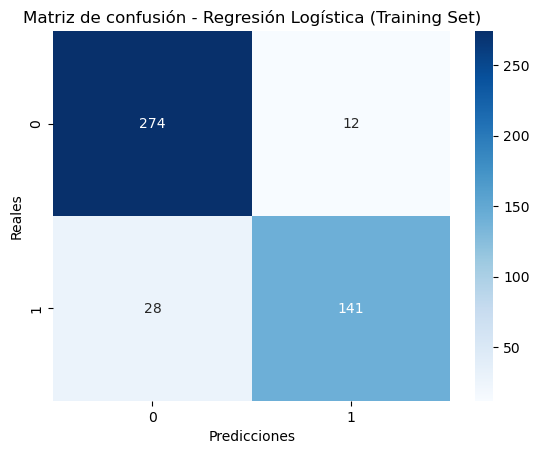

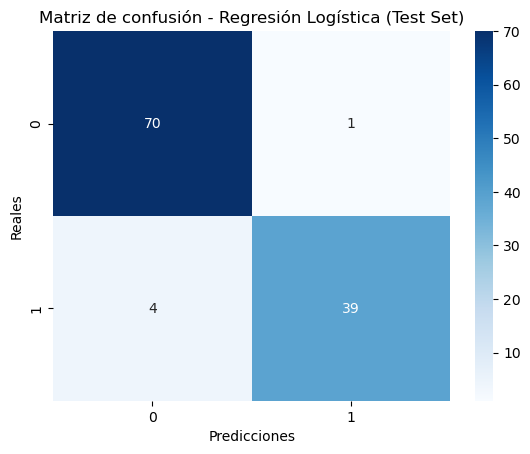

Exactitud del modelo: 0.956140350877193
Matriz de confusión:
[[70  1]
 [ 4 39]]


In [14]:
# Modelo de regresión logística
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Entrenamiento del modelo
logistic_regression.fit(X_train, y_train)

# Predecir en el conjunto de entrenamiento y prueba
y_pred_train = logistic_regression.predict(X_train)
y_pred_test = logistic_regression.predict(X_test)

# Matriz de confusión - entrenamiento
plot_confusion_matrix(y_train, y_pred_train, title="Matriz de confusión - Regresión Logística (Training Set)")

# Matriz de confusión - prueba
plot_confusion_matrix(y_test, y_pred_test, title="Matriz de confusión - Regresión Logística (Test Set)")

# Evaluación del modelo
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud del modelo:", accuracy)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_test))

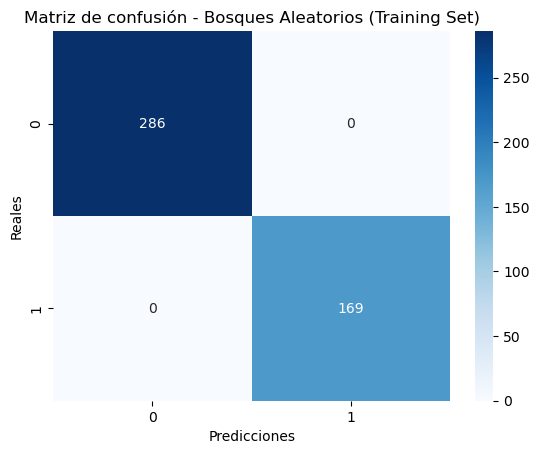

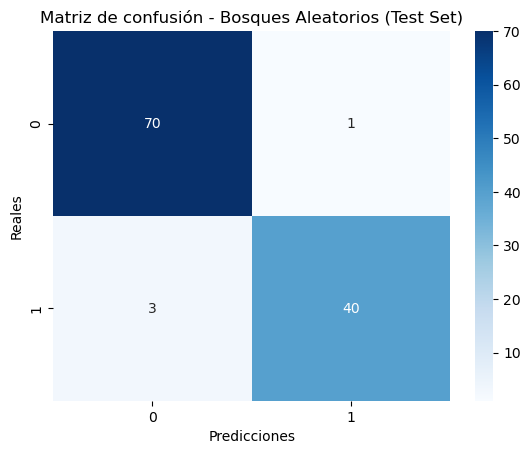

Exactitud del modelo: 0.9649122807017544
Matriz de confusión:
[[70  1]
 [ 3 40]]


In [15]:
# Modelo de Bosques Aleatorios - Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Entrenamiento del modelo
random_forest.fit(X_train, y_train)

# Predecir en el conjunto de entrenamiento y prueba
y_pred_train = random_forest.predict(X_train)
y_pred_test = random_forest.predict(X_test)

# Matriz de confusión - entrenamiento
plot_confusion_matrix(y_train, y_pred_train, title="Matriz de confusión - Bosques Aleatorios (Training Set)")

# Matriz de confusión - prueba
plot_confusion_matrix(y_test, y_pred_test, title="Matriz de confusión - Bosques Aleatorios (Test Set)")

# Evaluación del modelo
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud del modelo:", accuracy)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_test))

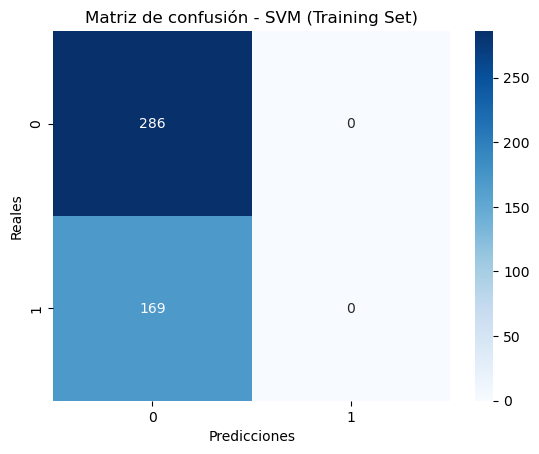

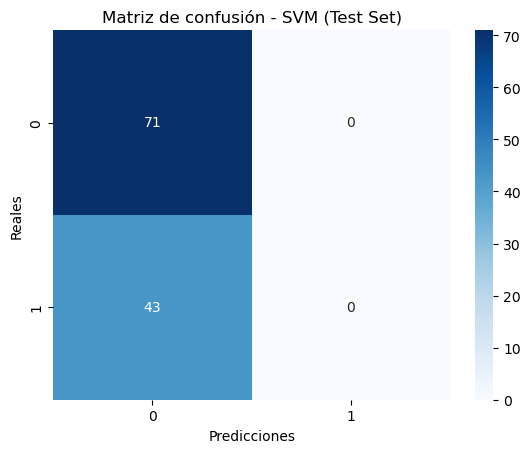

Exactitud del modelo: 0.6228070175438597


In [16]:
# Inicializar el modelo SVM
svm = SVC(random_state=42)

# Entrenar el modelo
svm.fit(X_train, y_train)

# Predecir en el conjunto de entrenamiento y prueba
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Matriz de confusión - entrenamiento
plot_confusion_matrix(y_train, y_pred_train, title="Matriz de confusión - SVM (Training Set)")

# Matriz de confusión - prueba
plot_confusion_matrix(y_test, y_pred_test, title="Matriz de confusión - SVM (Test Set)")

# Evaluación del modelo
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud del modelo:", accuracy)
